Epoch 1/100
38/38 [==============================] - 12s 122ms/step - loss: 0.0487
Epoch 2/100
38/38 [==============================] - 4s 118ms/step - loss: 0.0067
Epoch 3/100
38/38 [==============================] - 5s 118ms/step - loss: 0.0054
Epoch 4/100
38/38 [==============================] - 5s 134ms/step - loss: 0.0048
Epoch 5/100
38/38 [==============================] - 5s 119ms/step - loss: 0.0045
Epoch 6/100
38/38 [==============================] - 5s 123ms/step - loss: 0.0052
Epoch 7/100
38/38 [==============================] - 5s 127ms/step - loss: 0.0053
Epoch 8/100
38/38 [==============================] - 4s 118ms/step - loss: 0.0043
Epoch 9/100
38/38 [==============================] - 5s 123ms/step - loss: 0.0043
Epoch 10/100
38/38 [==============================] - 5s 120ms/step - loss: 0.0042
Epoch 11/100
38/38 [==============================] - 5s 118ms/step - loss: 0.0042
Epoch 12/100
38/38 [==============================] - 5s 121ms/step - loss: 0.0042
Epoch 13/100

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 2s 2s/step


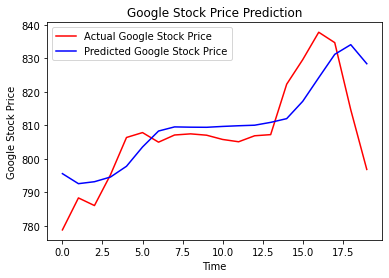

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Load the training data
df_train = pd.read_csv("/content/Google_Stock_Price_Train.csv")

# Scale the training data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_train_scaled = scaler.fit_transform(df_train[['Open']])

# Build the training data for the LSTM
X_train = []
y_train = []

for i in range(60, 1258):
    X_train.append(df_train_scaled[i-60:i, 0])
    y_train.append(df_train_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshape the training data for the LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Build the LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1))

# Compile and fit the LSTM model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Load the test data
df_test = pd.read_csv("/content/Google_Stock_Price_Test.csv")

# Concatenate the training and test data
df_total = pd.concat((df_train['Open'], df_test['Open']), axis=0)
inputs = df_total[len(df_total) - len(df_test) - 60:].values

# Reshape and scale the input data
inputs = inputs.reshape(-1, 1)
inputs = scaler.transform(inputs)

# Create the testing data for the LSTM
X_test = []

for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)


# Reshape the testing data for the LSTM
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Make predictions using the LSTM model
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Get the actual stock prices
actual_stock_price = df_test[['Open']].values

# Plot the results
plt.plot(actual_stock_price, color='red', label='Actual Google Stock Price')
plt.plot(predictions, color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()